# Step 0. Parameter Setting 

In [10]:
import dtnmonitor_v2 as dtn
import os,sys
import getpass



### P3. NUTTCP THREADS
## used in Step 2 :input threads number
count = 4

### P4. SELECT OUTPUT FILE , 
### used in Step 3 : nuttcp write file , the file number decides the amount of network flow threads 
file_write_nuttcp=[
"/data1/waue/w11",
"/data2/waue/w12",
"/data3/waue/w13",
"/data4/waue/w14",
    # "/foo/bar/filennn"
     ]

file2_write_nuttcp=[
"/data1/waue/w21",
"/data2/waue/w22",
"/data3/waue/w23",
"/data4/waue/w24",
    # "/foo/bar/filennn"
     ]


### P5.  SELECT THE MONITOR NETWORK INTERFACE  ###
## used in Step 4 , if you don't know the interface name, you can use 'all'
## make sure the interface is correct, error_naming or without network flow will get empty grath
#dtn.interface = 'eth0.1301'
#dtn.interface = 'eth0.2038' 
dtn.interface = 'enp103s0'
#dtn.interface = 'eth1'
#dtn.interface = 'all'



## run fio and check status
### select graph_mode [0|1] 
#graph_mode=0  # all, 
#graph_mode=1  # 100pt
graph_mode=0  

### Show Disk and Interface
import netifaces
import os
list=netifaces.interfaces()
print("==========================================================")
print('{:40s} {:20s} '.format("Network Interface","IP"))
print("==========================================================")
for inf in list:
    #print(inf)
    ff=netifaces.ifaddresses(inf)
    #print(ff)
    try:
        addr=ff[netifaces.AF_INET][0]['addr']
    except:
        continue
    print('{:40s} {:20s} '.format(inf,addr)) 

import getpass
user=getpass.getuser()
import subprocess
import re
df = subprocess.Popen(["df","-h"], stdout=subprocess.PIPE)
output = df.communicate()[0]
dfs = output.decode("utf8").split("\n")
dfs.pop(0)
print("==========================================================")
print('{:35s} {:7s}  {:7s} {:7s}'.\
      format("Disk mountpoint","size","avail","used%"))
print("==========================================================")
for i in dfs:
    try:
        xx = re.sub(" +"," ",i).split(" ")
        if len(xx) == 6:
            device, size, used, available, percent, mountpoint = xx
            print('{:35s} {:7s}  {:7s} {:7s}'\
                  .format(mountpoint,size,available,percent))
    except:
        continue
        
def exec_print(command):
    process = subprocess.Popen([command], stdout=subprocess.PIPE,stderr=subprocess.STDOUT, shell=True)
    for line in iter(process.stdout.readline, b''):
        # system print
        sys.stdout.write(line)      

Network Interface                        IP                   
lo                                       127.0.0.1            
enp103s0                                 192.168.100.1        
enp179s0                                 140.110.141.174      
docker0                                  172.17.0.1           
Disk mountpoint                     size     avail   used%  
/                                   50G      34G     34%    
/dev                                63G      63G     0%     
/dev/shm                            63G      63G     0%     
/run                                63G      59G     7%     
/sys/fs/cgroup                      63G      63G     0%     
/boot                               1014M    720M    30%    
/boot/efi                           200M     189M    6%     
/home                               158G     89G     44%    
/run/user/1000                      13G      13G     1%     
/data1                              745G     626G    16%    
/data2        

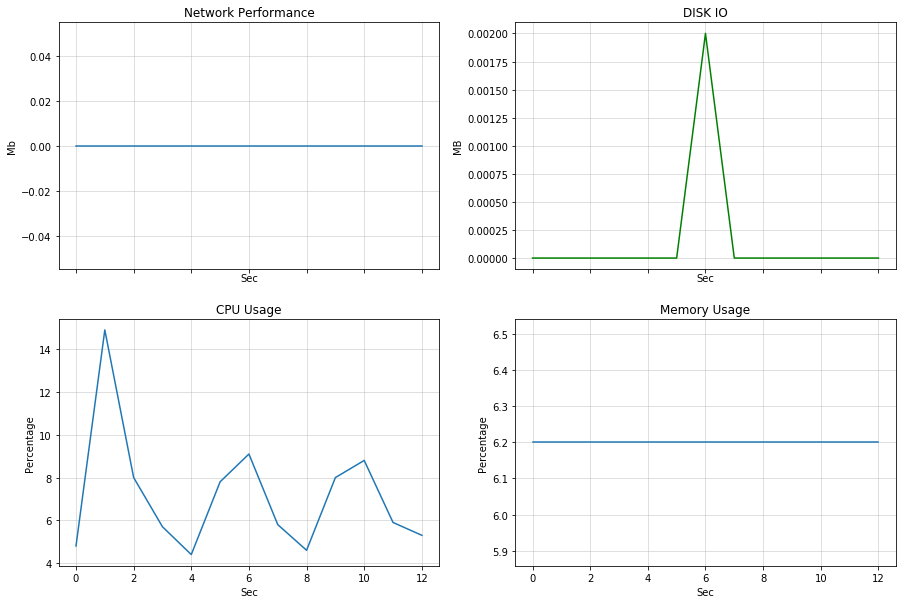

None

In [11]:

print("==========================================================")
print('{:60s} '.format("Initial checking"))
print("==========================================================")

command="ps aux |grep 'python3 '|wc -l"
process = subprocess.Popen([command], stdout=subprocess.PIPE,stderr=subprocess.STDOUT, shell=True)
ret=process.stdout.read().decode('utf8')



if int(ret) > 2: 
    print("System check ..... [ok]")
    print("Error!! Some process are running, please check first!!!")
    exec_print("ps -u "+ user +" ux |grep 'python3 '")
else : 
    print("System check ..... [ok]")
    print('Monitoring Network Interface => {:15s} '.format(dtn.interface))

# Step 1. Start servers for network transfer by disk

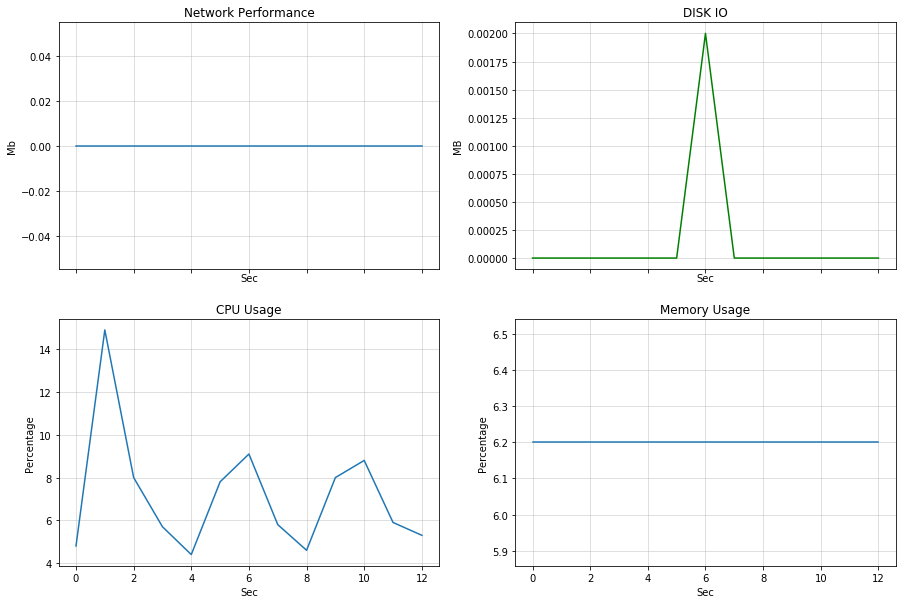

None

In [12]:


count= len(file_write_nuttcp)

for i in range(count):
    command = "nuttcp -S -1 -sdz -P 5300"+str(i)+" -p 5310"+str(i)+ " > "+ file_write_nuttcp[i] +" & "
    #print(command)
    os.system(command)
    command = "nuttcp -S -1 -sdz -P 5320"+str(i)+" -p 5330"+str(i)+ " > "+ file2_write_nuttcp[i] +" & "
    #print(command)
    os.system(command)
    #dtn.exec_sysout(command)



In [5]:
exec_print("sleep 3; ps -u "+ user +" ux |grep nuttcp")

waue      67264  0.0  0.0   4552   184 ?        Ss   17:09   0:00 nuttcp -S -1 -sdz -P 53001 -p 53101
waue      67267  0.0  0.0   4552   180 ?        Ss   17:09   0:00 nuttcp -S -1 -sdz -P 53201 -p 53301
waue      67270  0.0  0.0   4552   184 ?        Ss   17:09   0:00 nuttcp -S -1 -sdz -P 53002 -p 53102
waue      67273  0.0  0.0   4552   180 ?        Ss   17:09   0:00 nuttcp -S -1 -sdz -P 53202 -p 53302
waue      67276  0.0  0.0   4552   184 ?        Ss   17:09   0:00 nuttcp -S -1 -sdz -P 53003 -p 53103
waue      67278  0.0  0.0   4552   184 ?        Ss   17:09   0:00 nuttcp -S -1 -sdz -P 53203 -p 53303
waue      67296  0.0  0.0 113172  1352 ?        S    17:09   0:00 /bin/sh -c sleep 3; ps -u waue ux |grep nuttcp
waue      67299  0.0  0.0 112704   944 ?        S    17:09   0:00 grep nuttcp


# Step 2. Start Monitor

In [7]:
dtn.exec_command("python callmonitor_v2.py",graph_mode)

KeyboardInterrupt: 

## Step A . stop the test nuttcp

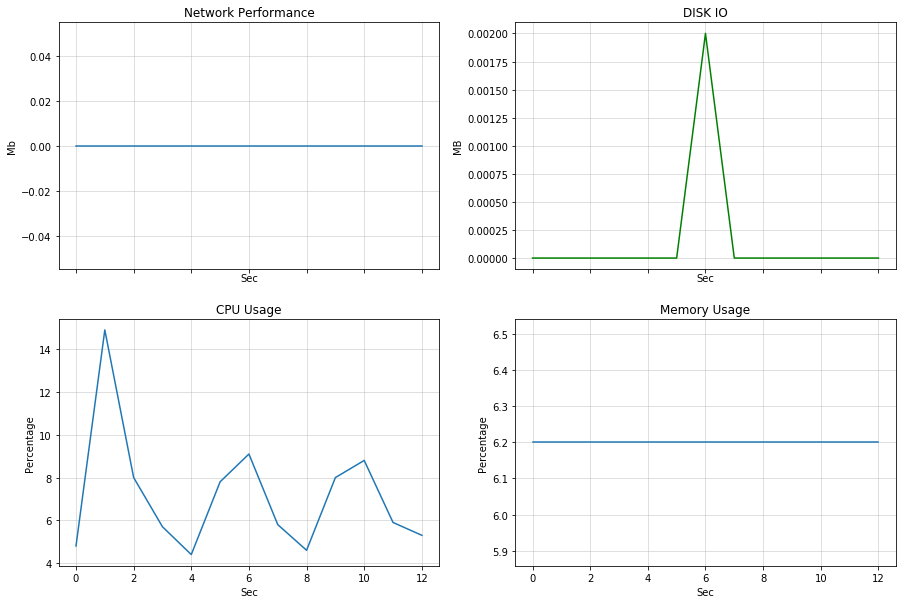

None

In [13]:
exec_print("pkill nuttcp")

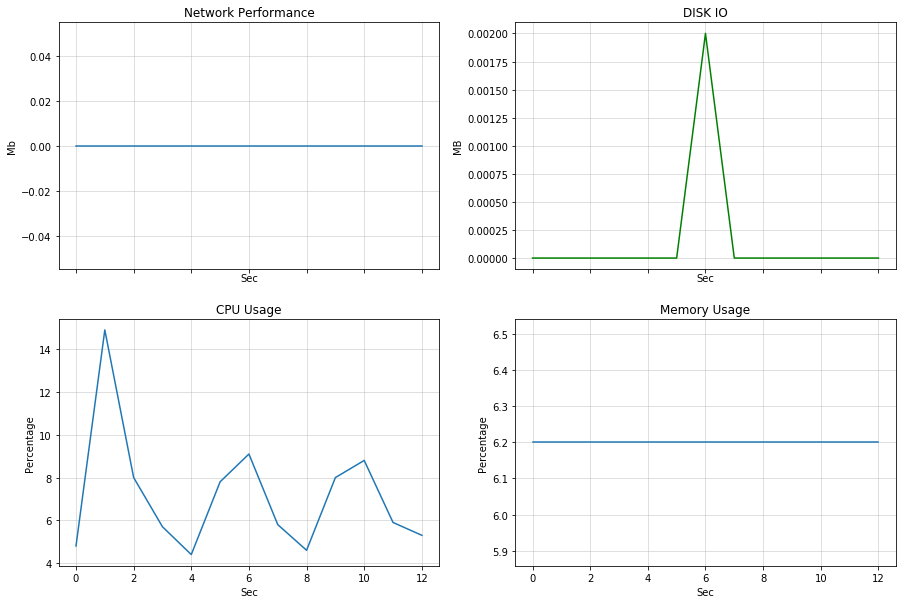

None

In [14]:
exec_print("sleep 3; ps -u "+ user +" ux |grep nuttcp")